# Diabietes Health Indicators
## **_Estela STANKOV & Izhaar MOHAMMAD_**

--------

</div>
<div class="alert alert-block alert-warning">
<b>CHÖSE A AMÉLIORER !!:</b> 

- mettre des matrices de confusion à chaque modèles pour montrer le taux dE FN et FP
- améliorer le modèle SVM et k-NN qui sont trop lent
- tester AdaBOOST
-Gradient Boosting
</div>

In [20]:
# importation des librairies

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC



In [2]:
#dataset : diabetes _ binary _ health _ indicators _ BRFSS2015.csv

df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df["Diabetes_binary"].value_counts()
# 0 = no diabetes 1 = diabetes

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

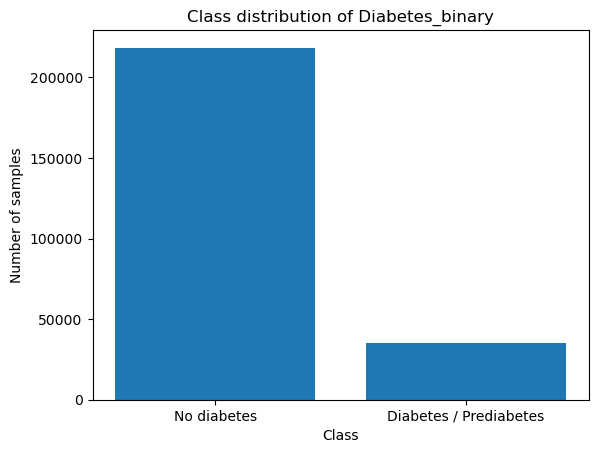

In [4]:
counts = df["Diabetes_binary"].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks([0, 1], ["No diabetes", "Diabetes / Prediabetes"])
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class distribution of Diabetes_binary")
plt.show()


On observe un fort déséquilibre entre les individus diabétiques et non diabétiques.

In [5]:
# séparation des variables explicatives et cibles 

X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]



In [6]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # TRÈS important avec des données déséquilibrées
)

# stratify=y permet de garder le même déséquilibre dans train et test


print('<Training Set Distribution> \n', y_train.value_counts(normalize=True).sort_index().map(lambda x: f'{x:.2%}'))
print()
print('<Test Set Distribution> \n', y_test.value_counts(normalize=True).sort_index().map(lambda x: f'{x:.2%}'))

<Training Set Distribution> 
 Diabetes_binary
0.0    86.07%
1.0    13.93%
Name: proportion, dtype: object

<Test Set Distribution> 
 Diabetes_binary
0.0    86.07%
1.0    13.93%
Name: proportion, dtype: object


## ~ PARTIE 1: Comparaison des modèles supervisés classiques (sans pondération)

___________

In [18]:
def evaluate_model(model, X_train, X_test, y_train, y_test): # pour l'évaluation de nos modèles
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test , model.predict_proba(X_test)[:, 1])

    print(classification_report(y_test, y_pred))

    return acc, f1, recall, roc_auc


In [19]:
# régression logistique 

lr = LogisticRegression(max_iter=1000)

print("\n" + "="*50)
print("régression logistiuque")
print("="*50)

acc_lr, f1_lr, rec_lr, roc_lr = evaluate_model(
    lr, X_train, X_test, y_train, y_test
)

acc_lr, f1_lr, rec_lr, roc_lr



régression logistiuque
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43667
         1.0       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



(0.8621491643014821,
 0.24192499458053326,
 0.157872400622436,
 0.8191563329232165)

In [ ]:
# NE PAS TOURNER !!!!!!

# k-NN --> prend trop de temps à tourner À FIXER !!!!
# k-NN est très mauvais pour les grands datasets
# k-NN est peu adapté à ce type de données de grande taille
# k-NN est peu adapté aux grands jeux de données car le temps de prédiction augmente fortement avec le nombre d’individus

knn = KNeighborsClassifier(n_neighbors=5)

print("\n" + "="*50)
print("k-NN")
print("="*50)

acc_knn, f1_knn, rec_knn, roc_knn = evaluate_model(
    knn, X_train, X_test, y_train, y_test
)

acc_knn, f1_knn, rec_knn, roc_knn



k-NN


In [9]:
# decision trEEEE

dt = DecisionTreeClassifier(random_state=42)

print("\n" + "="*50)
print("Decision Tree")
print("="*50)

acc_dt, f1_dt, rec_dt, roc_dt = evaluate_model(
    dt, X_train, X_test, y_train, y_test
)

acc_dt, f1_dt, rec_dt, roc_dt



Decision Tree
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43667
         1.0       0.30      0.33      0.31      7069

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736



(0.7981906338694418,
 0.31157130370469976,
 0.3277691328334984,
 0.5994065355726919)

In [10]:
# RF

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

print("\n" + "="*50)
print("Random Forrest")
print("="*50)

acc_rf, f1_rf, rec_rf, roc_rf = evaluate_model(
    rf, X_train, X_test, y_train, y_test
)

acc_rf, f1_rf, rec_rf, roc_rf



Random Forrest
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43667
         1.0       0.49      0.18      0.26      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736



(0.8595671712393567,
 0.261734535281318,
 0.17866742113453105,
 0.7963222804847303)

In [ ]:
#SVC
# Les SVM non linéaires sont coûteux en calcul et peu adaptés à de grands jeux de données
# Les SVM non linéaires sont coûteux en calcul et difficiles à appliquer à grande échelle.

#svm = SVC()
#svm = SVC(kernel="linear")

def evaluate_model(model, X_train, X_test, y_train, y_test): # pour l'évaluation de nos modèles
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    #roc_auc = roc_auc_score(y_test , model.predict_proba(X_test)[:, 1])

    print(classification_report(y_test, y_pred))

    return acc, f1, recall#, roc_auc

svm = LinearSVC()

print("\n" + "="*50)
print("SVM")
print("="*50)

acc_svm, f1_svm, rec_svm = evaluate_model(
    svm, X_train, X_test, y_train, y_test
)

acc_svm, f1_svm, rec_svm#, roc_svm



SVM
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43667
         1.0       0.56      0.07      0.12      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.53      0.52     50736
weighted avg       0.82      0.86      0.81     50736



(0.8626813308104699, 0.12353755189331991, 0.06945819776488896)

### Tableau récapitulatif 

In [17]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [acc_lr, acc_dt, acc_rf, acc_svm],
    "F1-score": [f1_lr, f1_dt, f1_rf, f1_svm],
    "Recall (Diabetes)": [rec_lr, rec_dt, rec_rf, rec_svm]
})

results


,Model,Accuracy,F1-score,Recall (Diabetes)
0,Logistic Regression,0.862149,0.241925,0.157872
1,Decision Tree,0.798191,0.311571,0.327769
2,Random Forest,0.859567,0.261735,0.178667
3,SVM,0.862681,0.123538,0.069458


## ~ PARTIE 2:  Pondération des classes & Analyse de l’impact du déséquilibre

Pourquoi on fait class_weight="balanced" ?
Le problème de fond de notre dataset = le déséquilibre

Dans notre dataset :

beaucoup de non diabétiques

peu de diabétiques

Un modèle naïf apprend : “Si je prédis toujours non diabétique, je suis souvent correct.”

ici, class_weight = "balanced", punit plus fortement les erreurs sur la classe minoritaire (diabétique)

Conséquence, le modèle fait plus attention aux diabétiques, le recall augmente, l’accuracy peut baisser

**CCL: La pondération des classes permet de corriger le biais induit par le déséquilibre.**


Analyse du déséquilibre (à dire avant)

Étudier l’impact du déséquilibre des classes sur les performances des modèles supervisés, en particulier sur la détection des individus diabétiques. Ici, on ne cherche pas le meilleur modèle. On fixe simplement les modèles et on change uniquement la gestion du déséquilibre.


-----------------

In [ ]:
#class_weight="balanced"
# "When class_weights=’balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies."
# https://tracyrenee61.medium.com/how-i-used-class-weights-balanced-to-solve-a-class-imbalance-problem-in-python-cceaecd4c659

In [21]:
lr_naive = LogisticRegression(max_iter=1000)

lr_naive.fit(X_train, y_train)
y_pred_naive = lr_naive.predict(X_test)




lr_balanced = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr_balanced.fit(X_train, y_train)
y_pred_balanced = lr_balanced.predict(X_test)


print("Logistic Regression - Naive")
print(classification_report(y_test, y_pred_naive))

print("\nLogistic Regression - Balanced")
print(classification_report(y_test, y_pred_balanced))



Logistic Regression - Naive
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     43667
         1.0       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736


Logistic Regression - Balanced
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43667
         1.0       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



👉 A Regarder surtout !!!!!

recall de la classe 1

f1-score

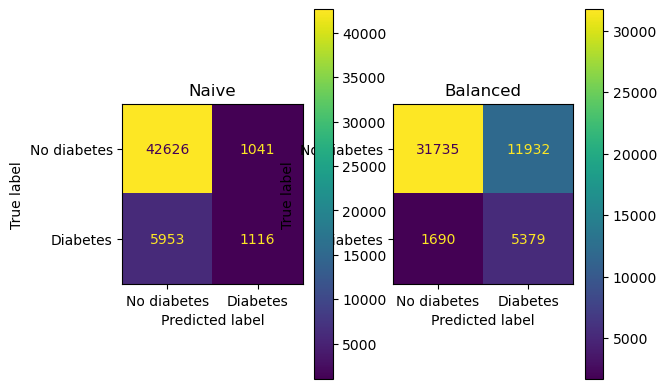

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_naive = confusion_matrix(y_test, y_pred_naive)
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

fig, axes = plt.subplots(1, 2)

ConfusionMatrixDisplay(
    cm_naive,
    display_labels=["No diabetes", "Diabetes"]
).plot(ax=axes[0])

axes[0].set_title("Naive")

ConfusionMatrixDisplay(
    cm_balanced,
    display_labels=["No diabetes", "Diabetes"]
).plot(ax=axes[1])

axes[1].set_title("Balanced")

plt.show()


In [23]:
## même analyse mais pour le RF cette fois ci 

rf_naive = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_naive.fit(X_train, y_train)
y_pred_rf_naive = rf_naive.predict(X_test)




rf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf_balanced.fit(X_train, y_train)
y_pred_rf_balanced = rf_balanced.predict(X_test)


print("Random Forest - Naive")
print(classification_report(y_test, y_pred_rf_naive))

print("\nRandom Forest - Balanced")
print(classification_report(y_test, y_pred_rf_balanced))



Random Forest - Naive
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43667
         1.0       0.49      0.18      0.26      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736


Random Forest - Balanced
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43667
         1.0       0.46      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.67      0.56      0.58     50736
weighted avg       0.82      0.86      0.83     50736



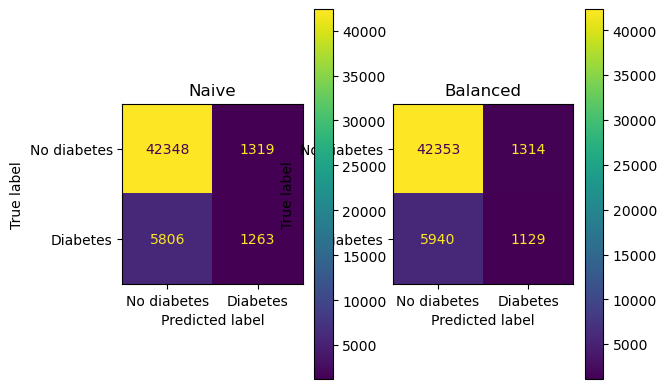

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_naive = confusion_matrix(y_test, y_pred_rf_naive)
cm_balanced = confusion_matrix(y_test, y_pred_rf_balanced)

fig, axes = plt.subplots(1, 2)

ConfusionMatrixDisplay(
    cm_naive,
    display_labels=["No diabetes", "Diabetes"]
).plot(ax=axes[0])

axes[0].set_title("Naive")

ConfusionMatrixDisplay(
    cm_balanced,
    display_labels=["No diabetes", "Diabetes"]
).plot(ax=axes[1])

axes[1].set_title("Balanced")

plt.show()

# A FAIRE !!!

🔹 Analyse du déséquilibre

Sans pondération, les modèles favorisent fortement la classe majoritaire, ce qui conduit à une sous-détection importante des cas diabétiques.

🔹 Effet de la pondération

La pondération des classes permet d’augmenter significativement le rappel de la classe minoritaire, au prix d’une légère baisse de l’accuracy globale.

🔹 Contexte santé

Dans un contexte de santé publique, la réduction des faux négatifs est prioritaire par rapport à la précision globale.